# **IE7275 Data Mining Final Project**

## **Oncology Dataset with Comparative Analysis of Supervised Learning Algorithms**

This project is aiming to apply various supervised
learning algorithms to predict if patients received metastatic cancer diagnosis within 90 days of screening, performing feature selection, tuning hyperparameters,and evaluating model performance using appropriate metrics.

**Background: Equity in Healthcare**

Healthcare inequity is a global challenge. Addressing this challenge has an extensive positive impact on women’s health, which is key for societies and economies to thrive. This datathon is designed to help you discover whether disparate treatments exist and to understand the drivers of those biases, such as demographic and societal factors.

**Overview: The Dataset and Challenge**

Gilead Sciences is the sponsor for this year’s WiDS Datathon. They provided a rich, real-world dataset which contains information about demographics, diagnosis and treatment options, and insurance provided about patients who were diagnosed with breast cancer from 2015-2018. The dataset originated from Health Verity, one of the largest healthcare data ecosystems in the US. It was enriched with third party geo-demographic data to provide views into the socio economic aspects that may contribute to health equity. For this challenge, the dataset was then further enriched with zip code level toxicology data NASA/Columbia University.

**Why is this important?**

Metastatic TNBC is considered the most aggressive TNBC and requires most urgent and timely treatment. Unnecessary delays in diagnosis and subsequent treatment can have devastating effects in these difficult cancers. Differences in the wait time to get treatment is a good proxy for disparities in healthcare access.

The primary goal of building these models is to detect relationships between demographics of the patient with the likelihood of getting timely treatment. The secondary goal is to see if environmental hazards impact proper diagnosis and treatment.

https://www.kaggle.com/competitions/widsdatathon2024-challenge1/overview


Cr:
https://www.kaggle.com/code/ddosad/wids-data-exploration-ml-starter

https://www.kaggle.com/code/thiagomantuani/wids-datathon2024-eda-modeling


**Phase 1: Dataset Selection and Preprocessing**

● Select a dataset suitable for supervised learning tasks.

● Perform data cleaning, normalization, and splitting into training and testing sets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# Import Visualization Packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Import Processing packages
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Read the CSV file from Drive
df = pd.read_csv('/content/drive/MyDrive/IE7275/training.csv')

# Display the DataFrame
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


We have the training dataset and test dataset ready and display to check the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [4]:
df.shape

(12906, 83)

In [5]:
df.isnull().sum()

patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64

- The dataset has 12906 entries, and total 83 columns in the training dataset.

- Some columns have missing values: patient_race, payer_type, patient_state, bmi, metastatic_first_novel_treatment, and metastatic_first_novel_treatment_type etc.

- Target is **DiagPeriodL90D**, using 1 to represent the cancer was diagnosed within 90 days, and 0 to represent the cancer was not diagnosed within 90 days.



In [6]:
df.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,3941.00,28.98,5.70,14.00,24.66,28.19,32.92,85.00
population,12905.00,20744.44,13886.90,635.55,9463.90,19154.19,30021.28,71374.13
density,12905.00,1581.95,2966.31,0.92,171.86,700.34,1666.52,21172.00
age_median,12905.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12905.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12905.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


## **Overview:**

1. **Demographics:**
   - The dataset includes information on patient demographics such as age, gender, marital status, family size, and race.
   - The mean age of patients is approximately 59 years, with a standard deviation of 13.34.
   - Around 50.10% of patients are male and 49.90% are female, predominantly equal gender distribution.
   - Approximately 47.68% of patients are married, while 12.67% are divorced, 33.83% are never married, and 5.81% are widowed.

2. **Economic Indicators:**
   - Household income median is around \$74,374, with a significant percentage (32.55%) having a six-figure income.
   - Homeownership rate is approximately 65.99%.
   - Rent median is $1,237.30, with a rent burden of 31.34%.

3. **Health Factors:**
   - BMI data is available for 3,941 patients, with a mean BMI of 28.98 and a standard deviation of 5.70.
   - Approximately 8.58% of patients are uninsured.
   - The dataset includes variables related to disability, limited English proficiency, veteran status, and diagnosis period.

4. **Environmental Factors:**
   - Air quality data includes Ozone, PM25, and NO2 levels.
   - The mean Ozone level is 39.82, PM25 is 7.48, and NO2 is 16.10.

5. **Conclusion:**
   - The dataset offers a comprehensive view of various factors that can impact health outcomes and quality of life.
   - Further analysis can explore correlations between different variables and their impact on health conditions or healthcare utilization.
   - Additionally, predictive modeling can be employed to forecast health outcomes based on demographic, economic, and environmental factors.
   - Quality of life indices could be derived by combining various socio-economic and environmental indicators.
   - Careful consideration should be given to missing data and outliers before drawing conclusions or making decisions based on the dataset.

In [7]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


**Summary of Categorical Variables:**

1. **Patient Race:**
   - Total count: 6521
   - Unique categories: 5
   - Top category: White (freq: 3588)

2. **Payer Type:**
   - Total count: 11103
   - Unique categories: 3
   - Top category: COMMERCIAL (freq: 6032)

3. **Patient State:**
   - Total count: 12855
   - Unique categories: 50
   - Top category: CA (California) (freq: 2438)

4. **Patient Gender:**
   - Total count: 12906
   - Unique categories: 1
   - Top category: F (Female) (freq: 12906)

5. **Breast Cancer Diagnosis Code:**
   - Total count: 12906
   - Unique categories: 50
   - Top category: 1749 (freq: 1982)

6. **Breast Cancer Diagnosis Description:**
   - Total count: 12906
   - Unique categories: 50
   - Top category: Malignant neoplasm of breast (female), unspecified (freq: 1982)

7. **Metastatic Cancer Diagnosis Code:**
   - Total count: 12906
   - Unique categories: 43
   - Top category: C773 (freq: 7052)

8. **Metastatic First Novel Treatment:**
   - Total count: 24
   - Unique categories: 2
   - Top category: PEMBROLIZUMAB (freq: 13)

9. **Metastatic First Novel Treatment Type:**
   - Total count: 24
   - Unique categories: 1
   - Top category: Antineoplastics (freq: 24)

10. **Region:**
    - Total count: 12854
    - Unique categories: 4
    - Top category: South (freq: 3919)

11. **Division:**
    - Total count: 12854
    - Unique categories: 9
    - Top category: East North Central (freq: 2923)

**Insights:**
- Most patients in the dataset are female (12906 out of 12906).
- The majority of patients are of White race (3588 out of 6521).
- Commercial insurance is the most common payer type.
- California (CA) has the highest number of patients.
- The dataset includes various diagnosis and treatment codes, with some treatments being novel and infrequent.
- Geographic regions and divisions are also represented, with the South and East North Central being the most common.

In [8]:
df.duplicated().sum()

0

**Phase 2: Exploratory Data Analysis (EDA) and Feature Selection**

● Conduct EDA to understand the dataset's characteristics.

● Apply feature selection techniques to identify relevant features for modeling.

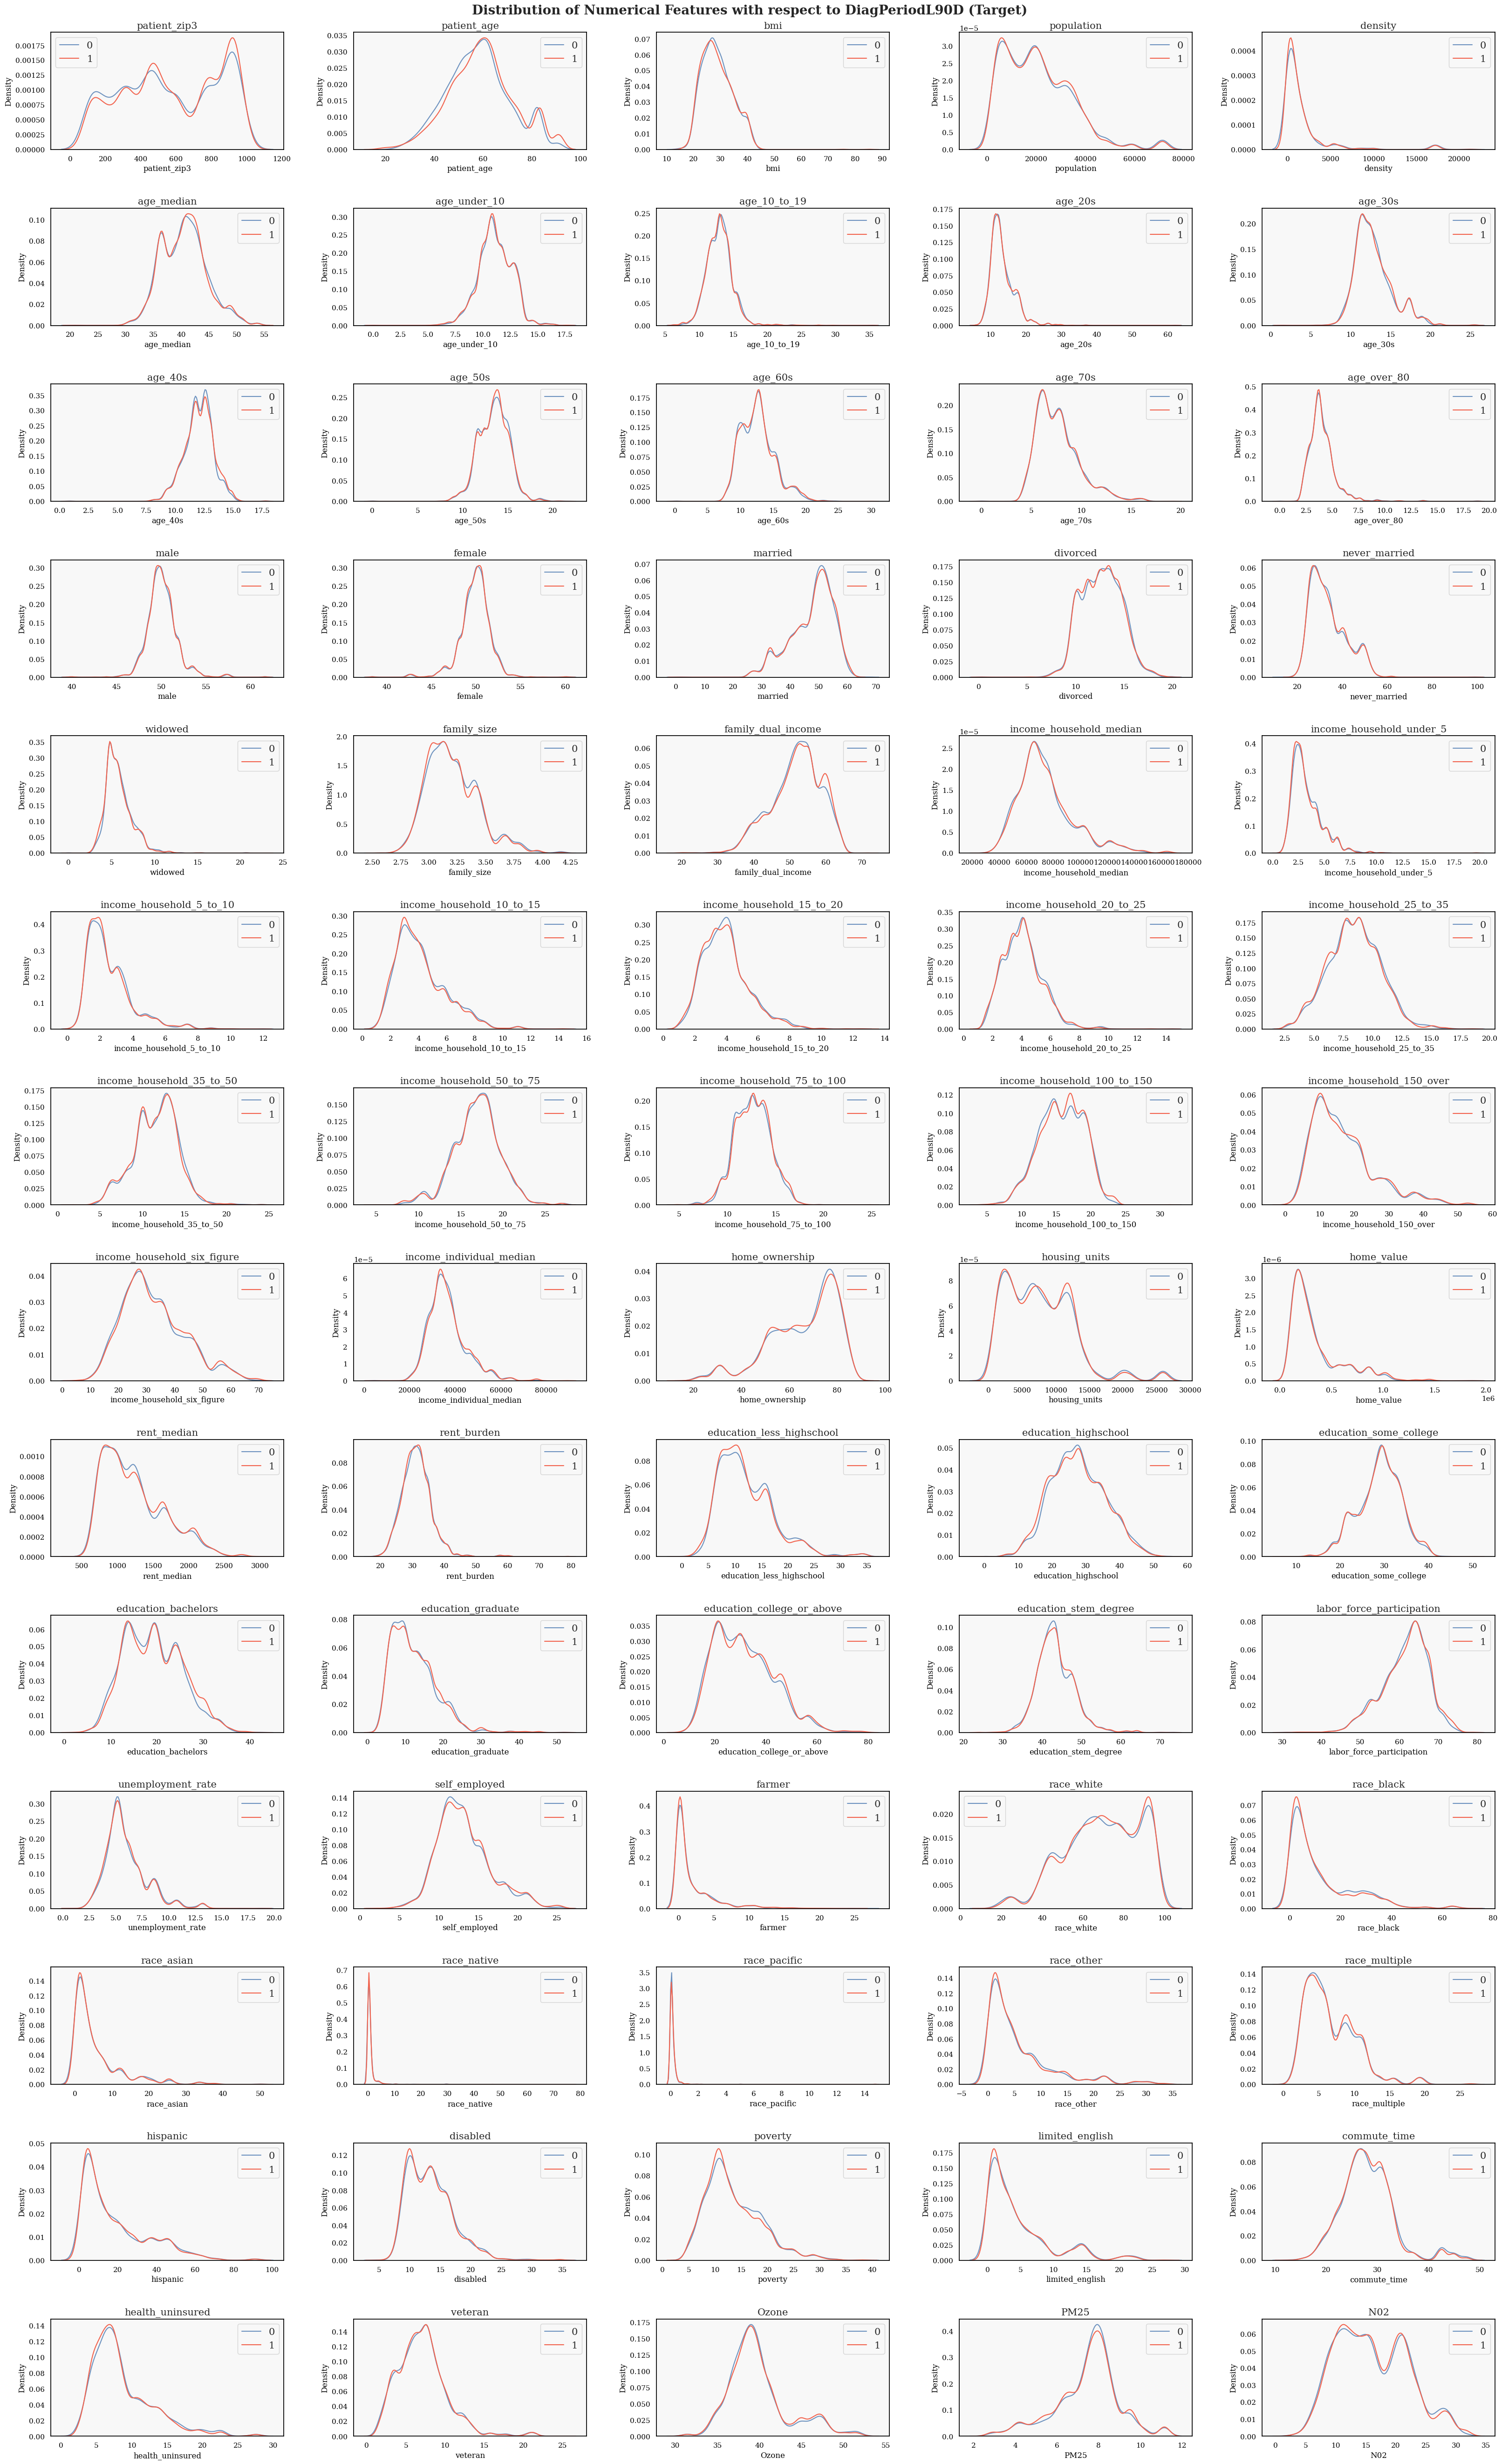

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom plotting style
plot_style = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

# Select numerical features for visualization, excluding specific columns
numerical_features = df.select_dtypes(include=['number']).drop(columns=['patient_id', 'DiagPeriodL90D'], axis=1)

# Create a new figure for plotting
fig = plt.figure(figsize=[40, 60])
sns.set(rc=plot_style)  # Apply custom plot style

# Set the main title for the figure
fig.suptitle('Distribution of Numerical Features with respect to DiagPeriodL90D (Target)', fontsize=20, fontweight='bold')

# Adjust space between subplots
fig.subplots_adjust(top=0.97)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Define title font settings
title_font_settings = {'fontsize': 15}

# Plot KDE plots for each numerical feature
for index, feature in enumerate(numerical_features):
    # Add a new subplot to the figure
    ax = fig.add_subplot(14, 5, index + 1)

    # Plot KDE for DiagPeriodL90D == 0
    sns.kdeplot(df[df['DiagPeriodL90D'] == 0][feature], color='#6d92bf', ax=ax, label='0')

    # Plot KDE for DiagPeriodL90D == 1
    sns.kdeplot(df[df['DiagPeriodL90D'] == 1][feature], color='#f2634e', ax=ax, label='1')

    # Set title for the subplot
    ax.set_title(feature, fontdict=title_font_settings)

    # Add legend to the subplot
    ax.legend(fontsize=15)

    # Turn off grid lines
    ax.grid(False)

# Display the plot
plt.show()


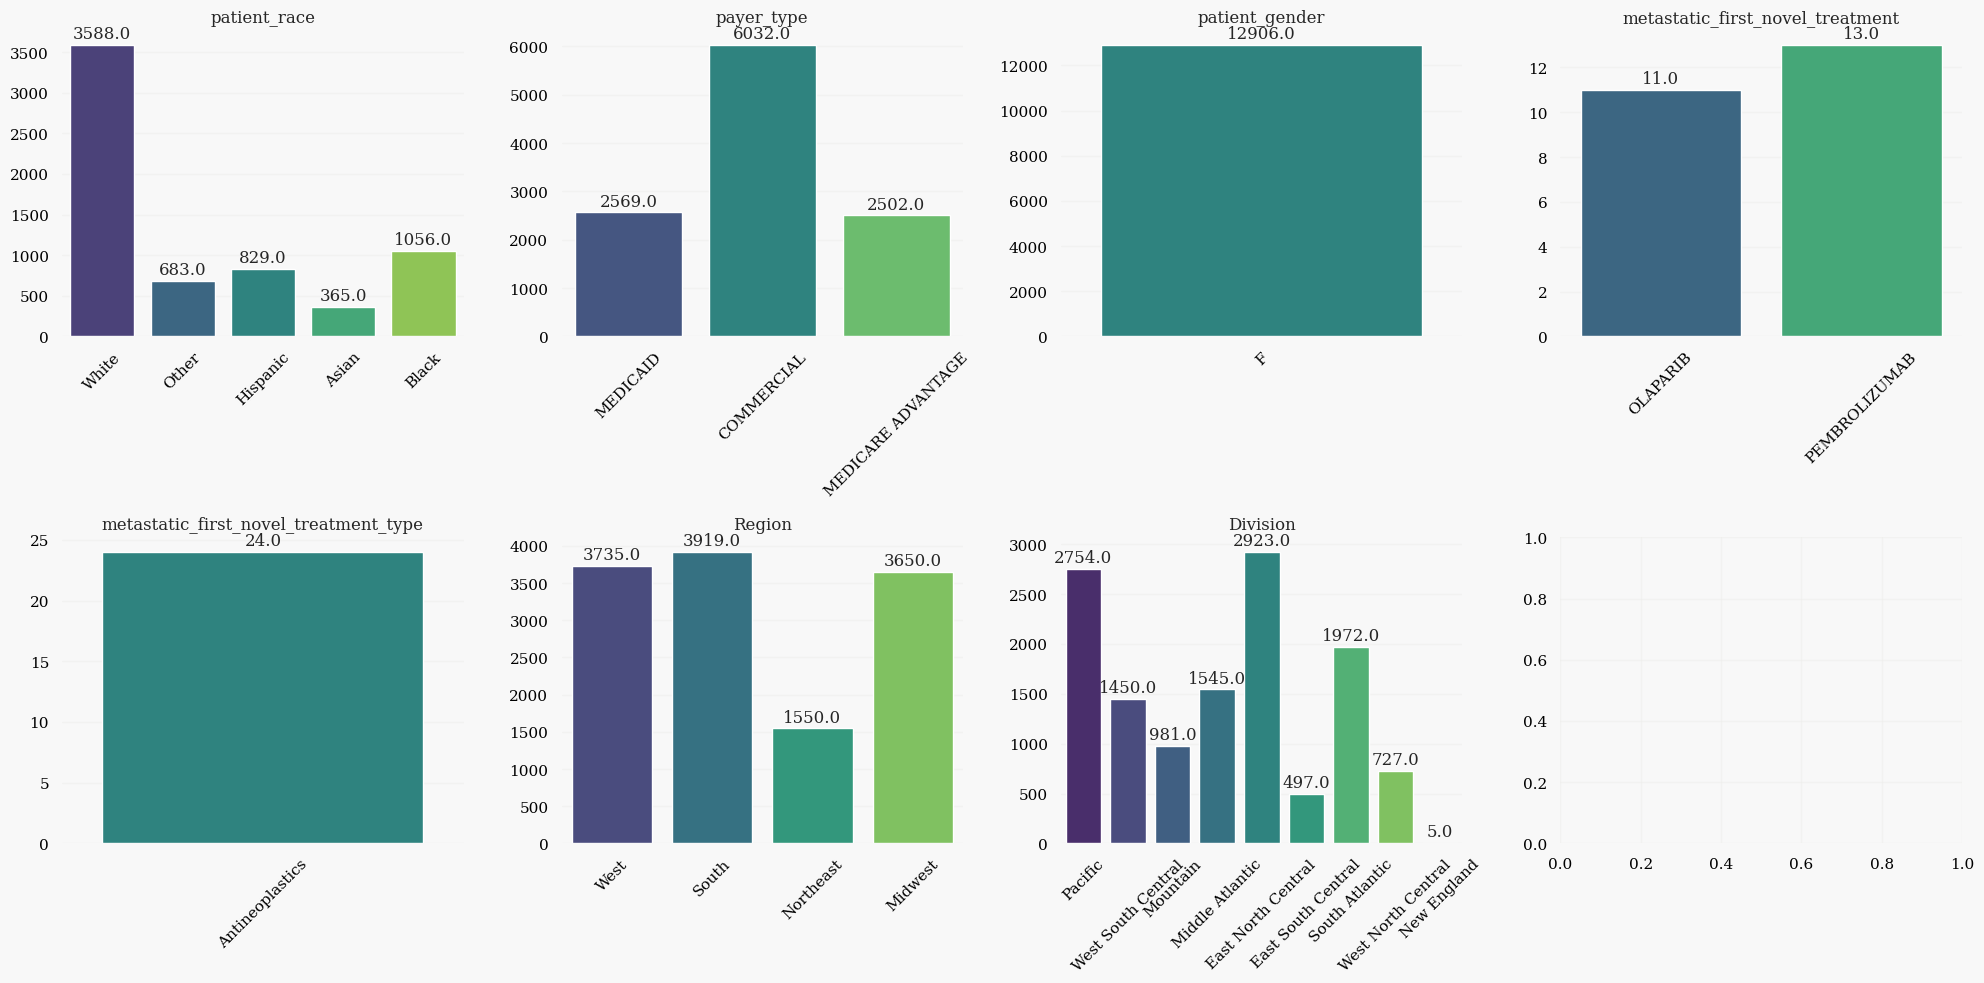

In [10]:
cat_columns = df.select_dtypes(include=['object']).drop(columns=['patient_state', 'breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code'], axis=1)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(cat_columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette='viridis')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)  # Set x-axis tick label rotation
    total = len(df[column])
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', xytext=(0, 8), textcoords='offset points')
    axes[i].set_title(f'{column}')
    sns.despine(left=True, bottom=True)


plt.tight_layout()
plt.show()


# **Summary of Categorical Variables:**

1. **Patient Race:**
- The majority of patients in the dataset are of White race (3588), followed by Black (1056), Hispanic (829), Asian (365), and Other races (683).

2. **Payer Type:**
- The dataset predominantly consists of patients with Commercial insurance (6032), with a smaller portion having Medicaid (2569) coverage, followed by Medicare Advantage (2502)

3. **Patient Gender:**
- All the patients are female (12906).

4. **Metastatic First Novel Treatment:**
- A relatively small portion of patients (13.0) received novel treatment for metastatic cancer within 90 days of screening.

5. **Metastatic First Novel Treatment Type:**
- Anthracyclines being the most common (24.0).

6. **Region:**
- The dataset covers multiple regions, with the South (3919.0) having the highest representation, followed by the West (3735.0), Midwest (3650.0), and Northeast (1550.0).

7. **Division:**
- The data is further divided into different divisions, with the Middle Atlantic (2923.0) and Pacific (2754.0) divisions having the highest representation.



In [11]:
# FEATURE ENGINEERING
from sklearn.base import BaseEstimator, TransformerMixin
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        return X.drop(self.cols, axis=1)

DropColumn(cols=['patient_race', 'payer_type', 'bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type']).fit_transform(df)

,patient_id,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,CA,924,84,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,CA,928,62,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,TX,760,43,F,C50112,Malignant neoplasm of central portion of left ...,C773,South,West South Central,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,CA,926,45,F,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,West,Pacific,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,ID,836,55,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,West,Mountain,...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,OH,436,50,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,Midwest,East North Central,...,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,CA,945,50,F,C50912,Malignant neoplasm of unspecified site of left...,C773,West,Pacific,...,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,CA,926,61,F,C50912,Malignant neoplasm of unspecified site of left...,C7931,West,Pacific,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,NY,112,37,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,Northeast,Middle Atlantic,...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [12]:
cols = ['patient_state','patient_zip3','patient_age','breast_cancer_diagnosis_code','breast_cancer_diagnosis_desc','metastatic_cancer_diagnosis_code','payer_type', 'DiagPeriodL90D']
data = df[cols]
data.isna().sum()

patient_state                         51
patient_zip3                           0
patient_age                            0
breast_cancer_diagnosis_code           0
breast_cancer_diagnosis_desc           0
metastatic_cancer_diagnosis_code       0
payer_type                          1803
DiagPeriodL90D                         0
dtype: int64

In [13]:
## Missing value imputations

# Impute categorical columns with mode
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Impute numerical columns with median
numerical_cols = data.select_dtypes(include='number').drop(columns=['DiagPeriodL90D']).columns
for col in numerical_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

In [14]:
data.isna().sum()

patient_state                       0
patient_zip3                        0
patient_age                         0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
metastatic_cancer_diagnosis_code    0
payer_type                          0
DiagPeriodL90D                      0
dtype: int64

**Phase 3: Model Implementation and Baseline Evaluation**

● Implement at least three supervised learning algorithms (e.g., SVM, Decision Trees,
Neural Networks).

● Evaluate baseline models using initial features without hyperparameter tuning.

In [15]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['DiagPeriodL90D'])
y = data['DiagPeriodL90D']
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns
categorical_columns = ['patient_state', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'payer_type']

# One-hot encode the categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_columns])

# Concatenate the encoded features with the numerical features
X_final = np.concatenate([X_encoded.toarray(), X.drop(columns=categorical_columns).values], axis=1)

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [16]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Machine": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multilayer Perceptron": MLPClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
results_df = pd.DataFrame(results.items(), columns=['Classifier', 'Accuracy'])

[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 119
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901


In [17]:
print(results_df.sort_values(by='Accuracy', ascending=False))

                   Classifier  Accuracy
7                    AdaBoost  0.816809
3   Gradient Boosting Machine  0.816034
0         Logistic Regression  0.815259
5                    LightGBM  0.809837
4                     XGBoost  0.804802
9                 Naive Bayes  0.788923
10      Multilayer Perceptron  0.782727
2               Random Forest  0.777304
6                 Extra Trees  0.747870
1      Support Vector Machine  0.626259
8         K-Nearest Neighbors  0.619675


**Phase 4: Hyperparameter Tuning**

● Use techniques like grid search or random search to find optimal hyperparameters for
each model.

● Re-evaluate models with tuned hyperparameters to assess performance improvements.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # AdaBoost algorithm ('SAMME' or 'SAMME.R')
}

# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier()

# Initialize GridSearchCV with the AdaBoost classifier and parameter grid
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters for AdaBoost:", grid_search.best_params_)

# Get the best estimator
best_ada_clf = grid_search.best_estimator_

# Evaluate the best classifier on the test set
accuracy = best_ada_clf.score(X_test, y_test)
print("Accuracy of Best AdaBoost Classifier:", accuracy)


Best Parameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}
Accuracy of Best AdaBoost Classifier: 0.8168086754453912


**Phase 5: Model Evaluation and Comparative Analysis**

● Evaluate models using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.

● Compare the performance, computational efficiency, and applicability of each algorithm.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = evaluate_model(y_test, y_pred)

results_df = pd.DataFrame(results.items(), columns=['Classifier', 'Metrics'])
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']] = pd.DataFrame(results_df['Metrics'].tolist(), index=results_df.index)
results_df.drop(columns=['Metrics'], inplace=True)


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 119
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901


In [20]:
results_df.sort_values(by='ROC-AUC', ascending=False)

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC-AUC
7,AdaBoost,0.816809,0.791242,0.961039,0.867914,0.768084
10,Multilayer Perceptron,0.816421,0.791136,0.960421,0.867598,0.767775
3,Gradient Boosting Machine,0.816034,0.790142,0.961657,0.867503,0.766839
0,Logistic Regression,0.815259,0.789634,0.961039,0.866946,0.766012
5,LightGBM,0.809837,0.790206,0.948052,0.861962,0.763145
4,XGBoost,0.804802,0.791820,0.933828,0.856981,0.761215
9,Naive Bayes,0.788923,0.794505,0.894249,0.841431,0.753342
2,Random Forest,0.774206,0.786268,0.878169,0.829682,0.739085
6,Extra Trees,0.748644,0.775941,0.841682,0.807476,0.717214
8,K-Nearest Neighbors,0.619675,0.675706,0.755102,0.713201,0.573924


**Phase 6: Conclusion and Recommendations**

● Summarize findings and insights gained from the comparative analysis.

● Provide recommendations on the most suitable algorithms for the dataset and problem
type.

Based on the comparative analysis of the classifiers using various metrics, here are the findings and insights:

1. **AdaBoost**, **Gradient Boosting Machine**, and **Multilayer Perceptron** performed the best overall in terms of accuracy, precision, recall, F1 score, and ROC-AUC. They consistently achieved high scores across multiple metrics, indicating their effectiveness in predicting the target variable.

2. **Logistic Regression** and **LightGBM** also performed well, although slightly lower than the top three classifiers. They exhibited good balance between different metrics and could be considered as reliable options for the task.

3. **XGBoost** showed competitive performance but slightly lower than Gradient Boosting Machine and AdaBoost.

4. **Naive Bayes** achieved moderate performance, particularly in terms of precision and recall.

5. **Random Forest**, **Extra Trees**, **K-Nearest Neighbors**, and **Support Vector Machine** had lower performance compared to other classifiers, especially in terms of accuracy and ROC-AUC.

6. Support Vector Machine had the lowest accuracy and ROC-AUC, suggesting it may not be the most suitable algorithm for this dataset and problem type.

Recommendations:
- Based on the overall performance, AdaBoost, Gradient Boosting Machine, and Multilayer Perceptron appear to be the most suitable algorithms for this dataset and problem type.
- Logistic Regression and LightGBM can also be considered as reliable alternatives, especially if computational efficiency is a concern.
- It's advisable to further fine-tune the parameters of the selected algorithms to potentially improve their performance further.
- Ensemble methods like AdaBoost and Gradient Boosting Machine can be particularly effective in handling complex datasets like this one and are worth exploring in more detail.